### (ii) Write a function to implement Gauss elimination with and without pivoting.
Also write the code to count the number of additions, multiplications
and divisions performed during Gaussian elimination.

In [48]:
import numpy as np
import pandas as pd
import time
import random
import math

In [45]:
def generate_matrix():
    test_cases = {}
    for case in range(100, 1100, 100):
        A = [[round(random.uniform(0,10),4) for _ in range(case)] for _ in range(case)]
        b = [round(random.uniform(0,10),4) for _ in range(case)]
        test_cases[case] = {'A': A, 'b': b} 
        
    return test_cases


# tests = generate_matrix()
# print(tests)

In [16]:
# Function to convert given number to dS arithmetic
def to_dS(N,d=5):
    if N==0:
        return 0
    else:
        # no of places to the left of the decimal point
        l = int(math.floor(math.log10(abs(N)))) + 1
        # no of floating points to be rounded
        f = d-l
        return round(N,f)

In [17]:
to_dS(139.59,d=4)

139.6

In [18]:
def get_rank(A):
    rank = len(A)
    for row in A:
        if sum(row) == 0:
            rank -= 1
    return rank

In [19]:
A = [[0,2,0,1],[2,2,3,2],[4,-3,0,1],[6,1,-6,-5]]
b = [0,-2,-7,6]

get_rank(A)

4

In [54]:
def gauss_ellimination(A,b,pivot_enable=True,d=5):
    nA = len(A)
    nb = len(b)
    add_count = 0
    mul_count = 0
    div_count = 0
    
    if nA != nb:
        print("Incompatible A matrix and b vector.")
        return 0
    
    # Create Augmented matrix
    A_b = A
    for i in range(nA):
        A_b[i].append(b[i])
    # print(A_b)

    ## Forward ellimination process -------------------
    # Do below for each row    
    for row in range(nA):
        # Partial pivotting (if enabled)
        if pivot_enable:
            # Current pivot value
            max_pivot = abs(A_b[row][row])
            max_pivot_index = row
            # Iterate through pivot column to find the maximum pivot value
            for i in range(row+1,nA):
                if max_pivot < abs(A_b[i][row]):
                    max_pivot = abs(A_b[i][row])
                    max_pivot_index = i
            
            # Do partial pivotting
            if row < max_pivot_index:
                A_b[row],A_b[max_pivot_index] = A_b[max_pivot_index],A_b[row]
            
        else:
            if A_b[row][row] == 0:
                print("Pivot value is zero. Please enable partial pivotting to do the calculations...")
                return 0

        ## Apply Row transformation for all the rows below current row
        pivot_element = A_b[row][row]
        for row2 in range(row+1, nA):
            # Interested element: The element that we set to zero
            interested_element = A_b[row2][row]

            # Check if interested element if zero and skip
            if interested_element == 0:
                continue

            # Calculate the row multiple value
            row_multiple = to_dS(interested_element/pivot_element,d)
            div_count += 1
            # Update the interested element to zero
            A_b[row2][row] = 0

            # Iterated through other columns to update the rest of the values in row
            # nA+1 since Augmented value at the end of row
            for col in range(row+1, nA+1):
                tmp = A_b[row2][col] - to_dS(row_multiple*A_b[row][col],d)
                A_b[row2][col]= to_dS(tmp,d)
                mul_count += 1
                add_count += 1
    # print("Augmented matrix after forward ellimination: \n", A_b)
    ## End of Forward ellimination process -------------------
    #list to keep results of x
    x = [None for _ in range(nA)]

    # Get the row echolon form from augmented matrix by removing the last element from each row
    # ref_A = list(A_b)
    ref_A = [None for _ in range(nA)]
    for i in range(nA):
        ref_A[i] = A_b[i][:]
        # print("Before pop: ", ref_A[i])
        # ref_A[i].pop()
        del ref_A[i][-1]
        # print("After pop: ", ref_A[i])

    # print("refA: ",ref_A)
    # print("AugA: ",A_b)

    # Check if the linear system has solutions
    # Case1: Finite solutions
    if get_rank(ref_A) == nA:
        ## Backward substitution process -------------------
        # Backward iteration loop for rows
        for row in range(nA-1,-1,-1):
            # Keep sum of product in a row
            row_sop = 0
            # Backward iteration loop for cols
            for col in range(nA-1,row,-1):
                tmp = to_dS(A_b[row][col]*x[col],d)
                row_sop = to_dS(row_sop+tmp,d)
                mul_count += 1
                add_count += 1
            # Obtain the x value: x = (b - row_sop)/a
            # print(A_b)
            tmp = to_dS(A_b[row][nA] - row_sop,d)
            x[row] = to_dS(tmp/A_b[row][row],d)
            add_count += 1
            div_count += 1

        # Return x solutions and operation counts
        print("Solution x = \n",x,"No of additions: ",add_count,"\n No of multiplications: ", mul_count, "\n No of divisions: ", div_count)
        return x,add_count,mul_count,div_count


    # Case2: No solutions
    elif get_rank(ref_A) != get_rank(A_b):
        print("Inconsistent linear system...")

    # Case3: Infinite solutions
    elif  get_rank(ref_A) < nA:
        print("Infinite solutions....")
        
    return 0





In [55]:
# A=print(tests[100]['A'])
# b=print(tests[100]['b'])

A = [[0,2,0,1],[2,2,3,2],[4,-3,0,1],[6,1,-6,-5]]
b = [0,-2,-7,6]

gauss_ellimination(A,b)

Solution x = 
 [-0.49998, 1.0001, 0.33337, -2.0] No of additions:  26 
 No of multiplications:  22 
 No of divisions:  9


([-0.49998, 1.0001, 0.33337, -2.0], 26, 22, 9)

(iii) Generate random matrices of size n × n where n = 100, 200, . . . , 1000.
Also generate a random b ∈ Rn for each case. Each number must be
of the form m.dddd (Example : 4.5444) which means it has 5 Significant
digits in total. Perform Gaussian elimination with and without
partial pivoting for each n value (10 cases) above. Report the number
of additions, divisions and multiplications for each case in the form of
a table. No need of the code and the matrices / vectors.

In [46]:
test_matrices = generate_matrix()

In [67]:
def guass_operation_count(n: int):
    """
    n: Number of row / columns in a square matrix
    """
    # Operation count for addition
    ref_addition = (n * (n+1) * (2 * n + 1)) / 6 # Number of addition for REF
    backsub_addition = (n * (n - 1)) / 2
    total_addition = ref_addition + backsub_addition
    
    # Operation count for multiplication
    total_multiplication = total_addition # Same as addition
    
    # Operation count for division
    ref_division = (n * (n-1)) / 2
    backsub_division = n
    total_division = ref_division + backsub_division

    # Summarize
    operation_count = {
        'addition': total_addition,
        'multiplication': total_multiplication,
        'division': total_division
    }
    
    return total_addition,total_multiplication,total_division

In [72]:
add,mul,div = guass_operation_count(4)
print(add,mul,div)

36.0 36.0 10.0


In [71]:
data = [0,0,0,0,0]
df = pd.DataFrame(columns=['N','Addition','Multiplication','Division','Pivotting'])

for i in range(100,200,100):
    A = test_matrices[i]['A']
    b = test_matrices[i]['b']
    
    # With pivotting, d=5
    x,add,mul,div = gauss_ellimination(A,b,True,5)
    add,mul,div = guass_operation_count(i)
    df.loc[i] = [i,add,mul,div,True]
    # df['N'].append(i)
    # df['Addition'].append(add)
    # df['Multiplication'].append(mul)
    # df['Division'].append(div)
    # df['Pivotting'].append(True)

    # Without pivotting, d=5
    x,add,mul,div = gauss_ellimination(A,b,False,5)
    add,mul,div = guass_operation_count(i)
    df.loc[i+1] = [i,add,mul,div,False]
    # df['N'].append(i)
    # df['Addition'].append(add)
    # df['Multiplication'].append(mul)
    # df['Division'].append(div)
    # df['Pivotting'].append(True)

Solution x = 
 [-74.386, -24.587, 33.182, 52.279, -53.286, 36.858, -0.81708, 12.199, -77.092, 50.783, 26.676, -31.723, -85.864, -30.828, -14.639, -7.9629, -18.079, -30.276, -6.3576, -35.938, -41.333, 0.39883, -0.26108, 72.774, -3.4881, -30.224, -5.6544, 48.834, 17.277, 46.582, 5.0528, -23.544, 82.315, 39.882, 78.858, -26.488, 11.731, 15.823, 144.19, -35.39, -28.593, -25.193, 0.5744, 68.986, 24.658, 71.371, 62.089, -2.0148, 13.64, 0.63779, 5.7453, -17.918, 14.175, -12.827, -2.8492, -5.8656, -51.213, 93.502, -20.614, -85.841, -114.55, -45.184, -41.179, -16.037, 0.72855, 3.44, 33.278, -10.41, 7.087, -21.448, 26.131, -45.164, -80.211, -20.697, -91.503, 12.916, 8.4589, 109.16, 86.836, 3.124, 39.709, 11.948, -22.636, -22.855, -24.312, -52.965, -24.879, 56.431, 85.198, 5.2452, -0.63799, -20.183, 67.232, 41.324, -63.691, -29.674, -54.555, 20.074, 49.266, -56.862] No of additions:  5050 
 No of multiplications:  4950 
 No of divisions:  100
Solution x = 
 [-74.386, -24.587, 33.182, 52.279, -53.

In [65]:
df

,N,Addition,Multiplication,Division,Pivotting
100,100,5050,4950,100,True
101,100,5050,4950,100,False


Slope with pivotting:  2.973677653475038


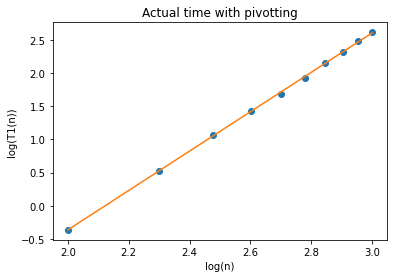

In [80]:
import matplotlib.pyplot as plt
x = np.array([math.log10(i) for i in range(100,1100,100)])
y_ = [0.43718, 3.3581, 11.64, 26.7, 49, 85.2, 141.58, 212, 302.33, 415.55]
y = np.array([math.log10(j) for j in y_])

plt.plot(x,y,'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
print("Slope with pivotting: ",m)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)



plt.ylabel('log(T1(n))')
plt.xlabel('log(n)')
plt.title('Actual time with pivotting')
plt.show()

Slope without pivotting:  3.0237825029839267


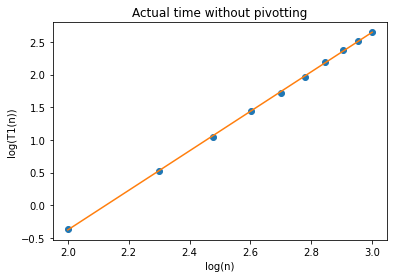

In [81]:
x = np.array([math.log10(i) for i in range(100,1100,100)])
y_ = [0.44, 3.35, 11.29, 27.55, 52.45, 91.81, 154.8, 238.6, 328.5, 442.88]
y = np.array([math.log10(j) for j in y_])

plt.plot(x,y,'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
print("Slope without pivotting: ",m)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

plt.ylabel('log(T1(n))')
plt.xlabel('log(n)')
plt.title('Actual time without pivotting')
plt.show()